## Installing Libraries

In [ ]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install plotly==5.3.1
!pip3 install dash
!pip3 install pycountry

  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

%matplotlib inline
plt.style.use('fivethirtyeight')

## Get Dataset
Before we can start manipulating and playing around with the data we need to load it. This could be done in a few ways:

- You can have the dataset directly on your drive
- You can provide a link to where the dataset lives (our case)
- You could also grab it directly from a GitHub repo

In [ ]:
COUNTRIES_AGG = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
US_CONFIRMED = "https://raw.githubusercontent.com/datasets/covid-19/main/data/us_confirmed.csv"
US_DEATHS = "https://raw.githubusercontent.com/datasets/covid-19/main/data/us_deaths.csv"
WORLDWIDE_AGG = "https://raw.githubusercontent.com/datasets/covid-19/main/data/worldwide-aggregate.csv"

In [ ]:
# Load the Countries Aggregate dataframe
# parse_dates tells the pandas to format the Data column
cont_agg = pd.read_csv(COUNTRIES_AGG, parse_dates=["Date"])

In [ ]:
cont_agg.head() # print top 5 rows

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


## Total Worldwide Cases

In [ ]:
# Count the number of Confirmed, Recovered, Deaths for a given Date for each country
# Axis=1 refers to Top-Bottom or Column wise, Axis=0 refers to row wise
cont_agg['Total_Cases'] = cont_agg[["Confirmed",  "Recovered", "Deaths"]].sum(axis=1)

## United States vs. Worldwide Cases

Another question that we can ask is: How many of the Worldwise cases are made up by the US?

This is a good question because it allows us to see the breakdown of how many cases are happening with in the USA.

In [ ]:
# filtered the country aggregate dataframe by country.
# Here we choose the US, and group by Date and take the sum of
# Confirmed, Recovered, and Deaths for each date
us_df = cont_agg[cont_agg["Country"] == "US"].groupby(["Date"]).sum()

## Daily United States Cases and Deaths

In this section we will answer the following question: How does the Cases and Deaths distribution look for the US? What are the dates were there are spikes? During which interval did we see the most deaths/cases?

In [ ]:
# reset the index from Dates to zero-indexing
us_df = us_df.reset_index()

In [ ]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5


In [ ]:
# Create a new column within us_df to calculate the number of Daily Confirmed Cases
# Count the number of confirmed cases in order
# So we need to for each row subsequently
# Since the rows are already ordered by Date
us_df["Daily_Confirmed"] = us_df["Confirmed"].sub(us_df["Confirmed"].shift())

In [ ]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases,Daily_Confirmed
0,2020-01-22,1,0,0,1,NaN
1,2020-01-23,1,0,0,1,0.0
2,2020-01-24,2,0,0,2,1.0
3,2020-01-25,2,0,0,2,0.0
4,2020-01-26,5,0,0,5,3.0


In [ ]:
# Do the same for Daily Deaths
us_df["Daily_Deaths"] = us_df["Deaths"].sub(us_df["Deaths"].shift())

In [ ]:
us_df.head()

,Date,Confirmed,Recovered,Deaths,Total_Cases,Daily_Confirmed,Daily_Deaths
0,2020-01-22,1,0,0,1,NaN,NaN
1,2020-01-23,1,0,0,1,0.0,0.0
2,2020-01-24,2,0,0,2,1.0,0.0
3,2020-01-25,2,0,0,2,0.0,0.0
4,2020-01-26,5,0,0,5,3.0,0.0


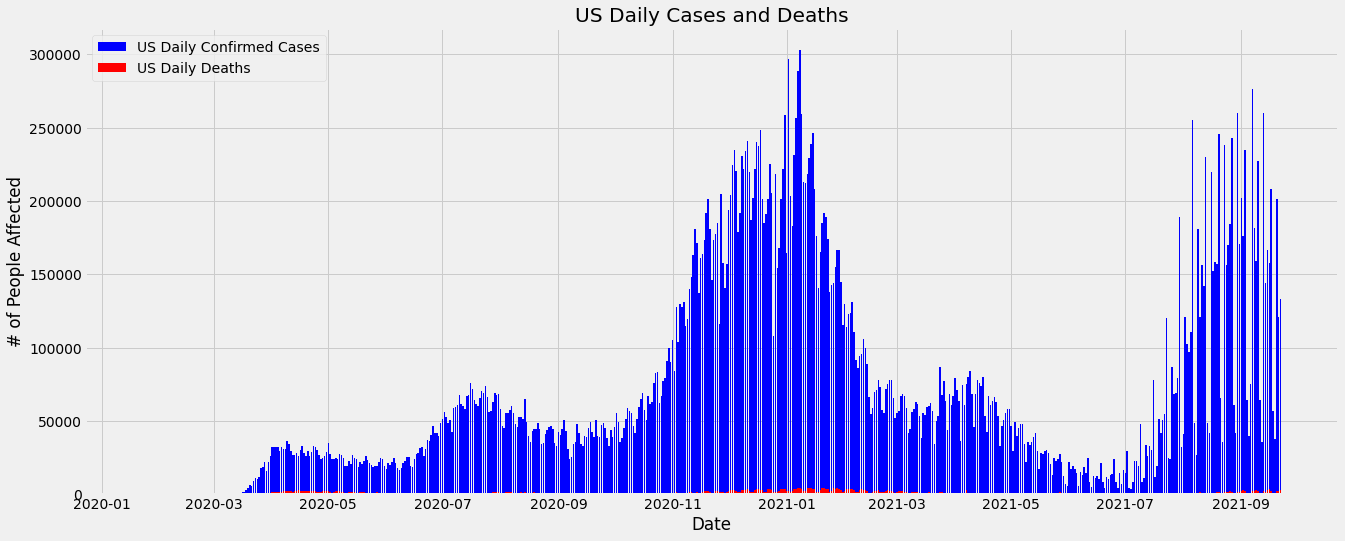

In [ ]:
# create another figure
# this time width 20 and height 8
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
# plot Date as x axis and Daily Confirmed as y axis
ax.bar(us_df["Date"], us_df["Daily_Confirmed"], color="b", label="US Daily Confirmed Cases")
# plot Date as x axis and Daily Deaths as y axis
ax.bar(us_df["Date"], us_df["Daily_Deaths"], color="r", label="US Daily Deaths")
# set x label
ax.set_xlabel("Date")
# set y label
ax.set_ylabel("# of People Affected")
# set title
ax.title.set_text("US Daily Cases and Deaths")

plt.legend(loc="upper left")
plt.show()

## US Deaths

Lets vizualise the number of deaths for each state on a given day

In [ ]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [ ]:
# create a new DataFrame with just the deaths from the US
us_deaths_df = pd.read_csv(US_DEATHS, parse_dates=['Date'])

In [ ]:
us_deaths_df.head()

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama


In [ ]:
# count the number of deaths with respect to the province/state
us_deaths_df = us_deaths_df.groupby(["Province/State"]).sum()

In [ ]:
us_deaths_df.head()

,Case
Province/State,
Alabama,3292976
Alaska,105765
American Samoa,0
Arizona,5465928
Arkansas,1808008


In [ ]:
# Rename the columns to make it easier to read
us_deaths_df = us_deaths_df.reset_index().rename(columns={"Province/State": "State"})

In [ ]:
us_deaths_df.head()

,State,Case
0,Alabama,3292976
1,Alaska,105765
2,American Samoa,0
3,Arizona,5465928
4,Arkansas,1808008


In [ ]:
# remove the rows that have state/provinces that are not listed in our codes list
# this includes the areas outside the US
us_deaths_df = us_deaths_df[us_deaths_df["State"].map(lambda x: x in list(code.keys()))]


In [ ]:
# map each state/province to its designated code
us_deaths_df["Code"] = us_deaths_df["State"].map(code)

In [ ]:
us_deaths_df.head()

,State,Case,Code
0,Alabama,3292976,AL
1,Alaska,105765,AK
3,Arizona,5465928,AZ
4,Arkansas,1808008,AR
5,California,18276902,CA


## Choropleth Maps

They require
- Geometry information, this can be supplied by GeoJSON file where each feature has either an id filed or some idetfying value in properties; or
- one of the built-in geometries within plotly: US state and world coutries
- A list of values indexed by feature identifies

In [ ]:
fig = px.choropleth(us_deaths_df, locations='Code',
                    color="Case",
                    color_continuous_scale="matter",
                    hover_name="State",
                    locationmode="USA-states",
                    labels={"Case": "COVID-19 Deaths"},
                    scope="usa")

fig.show()

ValueError: ignored

## China Map

In [ ]:
china_df = cont_agg[cont_agg["Country"] == "China"].groupby(["Date"]).sum()

In [ ]:
china_df["Daily_Confirmed"] = china_df["Confirmed"].sub(china_df["Confirmed"].shift())

In [ ]:
china_df["Daily_Deaths"] = china_df["Deaths"].sub(china_df["Deaths"].shift())

In [ ]:
china_df = china_df.reset_index() #resetting to include date column in graph
china_df = china_df.drop(china_df.index[0:246]) #only want up to a year's worth of data,so drop first 244 columns

In [ ]:
print(china_df)

In [ ]:
line_colors = ['green', 'red']

fig = px.line(china_df,
              x = 'Date',
              y = "Daily_Deaths",
              color_discrete_sequence = line_colors)

fig.add_scatter(x=china_df["Date"],
                y= china_df["Daily_Deaths"],
                mode="lines",
                name="Deaths")

fig.add_scatter(x=china_df["Date"],
                y= china_df["Daily_Confirmed"],
                mode="lines",
                name="Confirmed")

fig.update_layout(title='China Daily COVID Deaths vs. Daily Confirmed',
                   xaxis_title='Date',
                   yaxis_title='# of People Affected',
                  hovermode="x")

fig.show()

## Worldwide Daily Covid Cases Map


In [ ]:
import pandas as pd
import plotly.express as px

#create a new dataframe & import our data
df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")



In [ ]:
#Output the first 5 rows of the dataset
df.head()

In [ ]:
# Sort our data by date
df = df.sort_values(by=['date'])



In [ ]:
fig = px.choropleth(df, locations="iso_code",
                    color="new_cases",
                    hover_name="location",
                    animation_frame="date",
                    title = "Daily new COVID cases",
                   color_continuous_scale=px.colors.sequential.PuRd)
fig["layout"].pop("updatemenus")
fig.show()

# Confirmed, Recovered and Death Cases Across the Globe

In [ ]:

df_confirm= pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
df_confirm = df_confirm.groupby('Country').agg('sum')
date_list = list(df_confirm.columns)
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None
df_confirm['country'] = df_confirm.index
df_confirm['iso_alpha_3'] = df_confirm['country'].apply(get_country_code)

df_long = pd.melt(df_confirm, id_vars=['country','iso_alpha_3'], value_vars = date_list)

fig = px.choropleth(df_long,                            # Input Dataframe
                     locations="iso_alpha_3",           # identify country code column
                     color= "value",                     # identify representing column
                     hover_name= "country",              # identify hover name
                     animation_frame= "variable",        # identify date column
                     projection="natural earth",        # select projection
                     color_continuous_scale = 'Peach',  # select prefer color scale
                     range_color=[0,1000000]              # select range of dataset
                     )
fig.show()
fig.write_html("example_map.html")

ValueError: ignored

In [ ]:
!pip3y
 uninstall plotly

Found existing installation: plotly 5.3.1
Uninstalling plotly-5.3.1:
  Would remove:
    /usr/local/etc/jupyter/nbconfig/notebook.d/jupyterlab-plotly.json
    /usr/local/lib/python3.7/dist-packages/_plotly_future_/*
    /usr/local/lib/python3.7/dist-packages/_plotly_utils/*
    /usr/local/lib/python3.7/dist-packages/jupyterlab_plotly/*
    /usr/local/lib/python3.7/dist-packages/plotly-5.3.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/plotly/*
    /usr/local/lib/python3.7/dist-packages/plotlywidget/*
    /usr/local/share/jupyter/labextensions/jupyterlab-plotly/package.json
    /usr/local/share/jupyter/labextensions/jupyterlab-plotly/static/133.e938c05aa03322a03382.js
    /usr/local/share/jupyter/labextensions/jupyterlab-plotly/static/423.8409ad662b0daea3de31.js
    /usr/local/share/jupyter/labextensions/jupyterlab-plotly/static/478.a2ca696429f6c0bd6160.js
    /usr/local/share/jupyter/labextensions/jupyterlab-plotly/static/478.a2ca696429f6c0bd6160.js.LICENSE.txt
    /usr/local